Averge Bias for n values 

The avg bias when n taken 100 is 0.0637
The avg bias when n taken 200 is 0.0645
The avg bias when n taken 300 is 0.0632
The avg bias when n taken 400 is 0.0635
The avg bias when n taken 500 is 0.0635
The avg bias when n taken 600 is 0.0635
The avg bias when n taken 700 is 0.0634
The avg bias when n taken 800 is 0.0637
The avg bias when n taken 900 is 0.0637
The avg bias when n taken 1000 is 0.0637


Variance for different n values 

The avg vaiance when n taken 100 is 0.0017
The avg vaiance when n taken 200 is 0.0007
The avg vaiance when n taken 300 is 0.0003
The avg vaiance when n taken 400 is 0.0002
The avg vaiance when n taken 500 is 0.0004
The avg vaiance when n taken 600 is 0.0003
The avg vaiance when n taken 700 is 0.0003
The avg vaiance when n taken 800 is 0.0001
The avg vaiance when n taken 900 is 0.0001
The avg vaiance when n taken 1000 is 0.0002


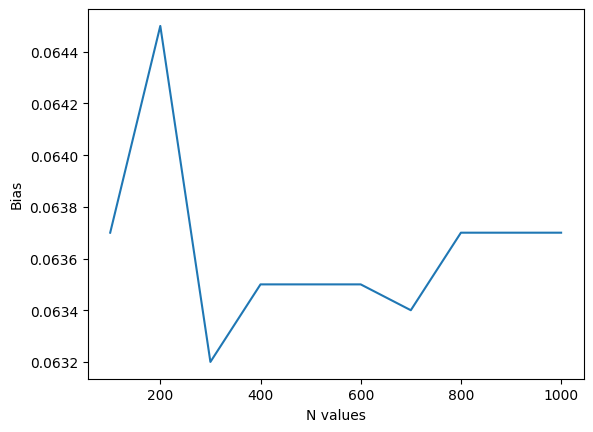

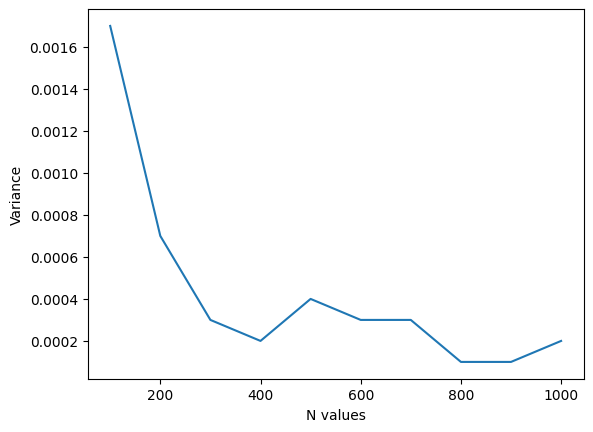

In [1]:
from audioop import avg
from csv import reader
from ctypes import BigEndianStructure
from math import sqrt
from statistics import variance
import numpy as np
from csv import reader
from math import sqrt
from random import seed
from random import randrange
import matplotlib.pyplot as plt
    
Test_set= []
x1 = np.random.uniform(1,10,100)
x2 = np.random.uniform(2,5,100)
for i in range(0,100):
    a = []
    a.append(x1[i])
    a.append(x2[i])
    e = np.random.normal(0,0.25,1)
    t =  4 + x1[i]+ 3*x2[i] + e
    a.append(t[0])
    Test_set.append(a)  

def linear_regression(train,test_row):
     Z = []
     Y = []
     for row in train:
        r = []
        r.append(1)
        r.append(row[0])
        r.append(row[1])
        Z.append(r)                             
        Y.append(row[2])  
     zt = np.transpose(Z)

     theta = np.dot(zt,Z)
     theta = np.linalg.inv(theta)
     theta = np.dot(theta,zt)
     theta = np.dot(theta,Y)
     y  = theta[0] + theta[1]*test_row[0]  + theta[2]*test_row[1]
     return y

def bias_variance(train,test_row,n):
   y = []
   i=0
   while i < 10*n:
     y.append(linear_regression(train[slice(i,i+n)],test_row))
     i += n
   ymean = sum(y)/10 
   bias = (test_row[2] - ymean)**2
   var = 0
   for i in y:
    var += (i - ymean)**2
   var /= 10  

   return bias,var

def generate_n_dataset(n):
 Train_set = []
 x1 = np.random.uniform(1,10,10*n)
 x2 = np.random.uniform(2,5, 10*n)
 for i in range(0,10*n):
    a = []
    a.append(x1[i])
    a.append(x2[i])
    e = np.random.normal(0,0.25,1)
    t =  4+x1[i]+ 3*x2[i] + e
    a.append(t[0])
    Train_set.append(a)
 return Train_set

def algorithm(): 
 n = 100
 Bias_arr = []
 Variance_arr = []
 n_arr = [100,200,300,400,500,600,700,800,900,1000]
 while n <= 1000:
  Train_set =  generate_n_dataset(n)   
  Bias = []
  Variance = []
  for row in Test_set:
     bias,var = bias_variance(Train_set,row,n)
     Bias.append(bias)
     Variance.append(var)   
  avg_bias = sum(Bias)/100
  avg_variance = sum(Variance)/100
  avg_bias = float("{0:.4f}".format(avg_bias))
  avg_variance = float("{0:.4f}".format(avg_variance))
  Bias_arr.append(avg_bias)
  Variance_arr.append(avg_variance)
  n +=100
 print("Averge Bias for n values","\n")
 n=100
 for i in Bias_arr:
   print("The avg bias when n taken",n,"is",i)
   n += 100
 print("\n")
 n = 100
 print("Variance for different n values","\n")
 for i in Variance_arr:
  print("The avg vaiance when n taken",n,"is",i)
  n += 100

 x = np.array(n_arr)  # X-axis points
 y = Bias_arr # Y-axis points
 plt.xlabel('N values')
 plt.ylabel('Bias')  
 plt.plot(x, y)  # Plot the chart
 plt.show() 
 x = np.array(n_arr)  # X-axis points
 y = Variance_arr # Y-axis points
 plt.xlabel('N values')
 plt.ylabel('Variance')  
 plt.plot(x, y)  # Plot the chart
 plt.show() 
algorithm() 